In [15]:
from src.data import data_prep
from src.models import cnn_model
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from src.data import data_prep
from src.models import mlp_model, cnn_model, evaluate_model


In [2]:
X_train_mlp, X_test_mlp, X_train_cnn, X_test_cnn, y_train, y_test = data_prep(nivel_ruido=0.0)

#Conversão das labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
model_cnn = cnn_model()
model_cnn.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_cnn_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

epochs = 20
batch_size = 256
history_cnn = model_cnn.fit(X_train_cnn, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.2,
                            callbacks=[early_stopping, model_checkpoint])

with open('history_cnn.json', 'w') as f:
    json.dump(history_cnn.history, f)

C:\Users\pedro.neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.8931 - loss: 0.3530 - val_accuracy: 0.9724 - val_loss: 0.0908
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9727 - loss: 0.0878 - val_accuracy: 0.9825 - val_loss: 0.0591
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9813 - loss: 0.0606 - val_accuracy: 0.9857 - val_loss: 0.0456
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.9849 - loss: 0.0488 - val_accuracy: 0.9866 - val_loss: 0.0439
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9891 - val_loss: 0.0383
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.9906 - loss: 0.0315 - val_accuracy: 0.9894 - val_loss: 0.0383
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9900 - val_loss: 0.0375
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9921 - loss: 0.0241 - 

In [6]:
# Avaliação do modelo
scores, acc = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', acc)

Test loss: 0.02574739046394825
Test accuracy: 0.9911999702453613


In [13]:
resultados_cnn = evaluate_model(model_cnn, X_test_cnn, y_test)

Ruído 0.0: Acurácia = 0.9912, Perda = 0.0257
Ruído 0.1: Acurácia = 0.9906, Perda = 0.0276
Ruído 0.3: Acurácia = 0.9729, Perda = 0.0970
Ruído 0.5: Acurácia = 0.7331, Perda = 0.7625


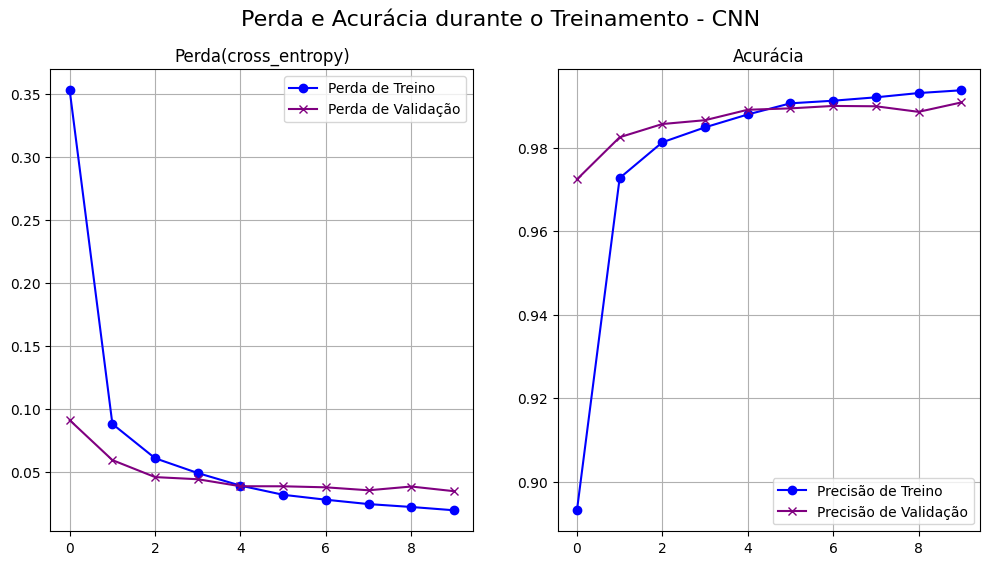

In [29]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle(f'Perda e Acurácia durante o Treinamento - CNN', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
#Grafico de perda
ax.plot(history_cnn.history["loss"],marker = 'o', color = 'blue', label="Perda de Treino")
ax.plot(history_cnn.history["val_loss"],marker = 'x', color = 'purple', label="Perda de Validação")
ax.legend()
ax.set_title('Perda(cross_entropy)')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2)
ax.plot(history_cnn.history["accuracy"],marker = 'o', color = 'blue', label="Precisão de Treino")
ax.plot(history_cnn.history["val_accuracy"],marker = 'x', color = 'purple', label="Precisão de Validação")
ax.legend()
ax.set_title('Acurácia')
ax.grid(True)

plt.show()

#Exportar figura
fig.savefig('figures/cnn_loss_accuracy.png')